In [85]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt 
from astropy.table import hstack

We cut quasars at z=2 : otherwise our quasar sample would go into the stellar locus

In [86]:
# Load the cross-matched HLC-NSC catalog
hlc_nsc = Table(np.load('hlc_nsc_half_arcsec.npy'))

# Load the QSO training sample
qso = Table(np.load('hlc_nsc_sdss_qso_matches.npy'))

# Load the standard stars training sample 
stars = Table(np.load('hlc_nsc_sdss_stars_matches.npy'))

Bovy+2011 :  http://iopscience.iop.org/article/10.1088/0004-637X/729/2/141/pdf ( a good illustration of how QSO really move out of the u-g<0.5 locus beyond z=2 )

<img src='bovy2011_fig7.png' width=900>

Fan+1999 : http://iopscience.iop.org/article/10.1086/300848/pdf ( shows the redshift color evolution of quasars) 
<img src='fan1999_fig12.png'>

Suberlak+2017: Hessian with SDSS S82 sources from the LSST re-processed S82 data
<img src='suberlak2017_fig11.png' width=500> Colors in the upper-right panel indicate the selection by region in color-color space, as in Ivezic+2004 http://faculty.washington.edu/ivezic/Publications/astroph_0310566.pdf. Objects in the red region are mostly quasars,  those in the blue are  hot stars (white dwarfs),  in black - main sequence stars, and in green - the transitional region. It shows  that indeed quasars occupy the same color-color space as in Fig.9.18 from AstroML <img src='fig9-18_astroml.png' width=600>  Here "Stars are indicated by gray points, while quasars are indicated by black points." (http://www.astroml.org/book_figures/chapter9/fig_star_quasar_ROC.html)

(array([  106.,   412.,   668.,   891.,  1425.,  2818.,  6627.,  8280.,
          795.,     0.]),
 array([ 0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,
         1.04,  1.1 ]),
 <a list of 10 Patch objects>)

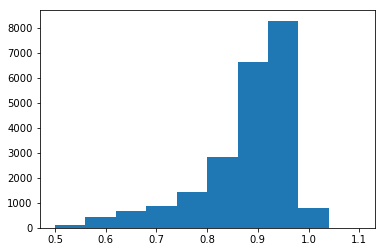

In [31]:
# Just to confirm - since these 
# are quasars,  their class_star should be pretty high...
plt.hist(qso['NSCclass_star'], range=(0.5,1.1))

In [95]:
hlc_nsc[:4]

HLCumag,HLCgmag,HLCrmag,HLCimag,HLCzmag,HLCuerr,HLCgerr,HLCrerr,HLCierr,HLCzerr,HLCuRED,HLCgRED,HLCrRED,HLCiRED,HLCzRED,HLC_LC_NAME,HLC_MEAN_OBJECT_TYPE,HLC_RA_MEAN_CLIP_W,HLC_MEAN_CHILD,HLC_DEC_MEAN_CLIP,NSCra,NSCdec,NSCpmra,NSCpmraerr,NSCpmdec,NSCpmdecerr,NSCmjd,NSCdeltamjd,NSCgmag,NSCgrms,NSCgerr,NSCrmag,NSCrrms,NSCrerr,NSCimag,NSCirms,NSCierr,NSCclass_star,NSCfwhm,NSCebv,NSCnphot,NSCraW,sep_2d_arcsec_HLC_NSC
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str46,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
0.0,21.3639,20.8091,20.4781,20.2701,0.0,0.00941745,0.0082472,0.00943463,0.0361048,0.180108,0.132522,0.0961157,0.0728816,0.051674,RA_02_to_03/40/lc_02_40_00.005_+00_57_59.213_t,3.0,40.0000230304,0.0300752,0.96645026832,40.0000523531,0.966426545856,-5.516259496,12.9650190456,26.9726652453,12.8724091791,56870.8114056,1405.17,20.0721,0.098239,0.012658,19.686,0.042124,0.008258,19.4538,0.02361,0.012738,0.116927,4.82994,0.034939,26,40.0000523531,0.135769734764
0.0,0.0,22.2674,21.2557,20.6434,0.0,0.0,0.0277097,0.0129968,0.0378403,0.144875,0.106597,0.0773133,0.0586243,0.0415654,RA_02_to_03/40/lc_02_40_00.037_-00_30_14.115_t,3.8427,40.0001536432,0.0,-0.503921566803,40.000176634,-0.503920470891,1.62524510082,11.1497786021,-4.1398563572,11.1677993135,56830.9472776,1426.19,23.2018,0.187068,0.124258,21.8853,0.103384,0.024075,21.019,0.075514,0.02213,0.533798,1.70803,0.028103,28,40.000176634,0.0828576074893
0.0,21.0933,20.7569,20.6232,20.5046,0.0,0.00801419,0.00778913,0.0103333,0.0382449,0.180775,0.133012,0.0964716,0.0731515,0.0518653,RA_02_to_03/40/lc_02_40_00.046_+00_56_04.959_t,5.83846,40.0001909738,0.0,0.934708805931,40.0002228403,0.934685037157,-15.3442544341,6.66670863734,13.0127400175,6.65793608497,56803.2721141,1405.17,21.0517,0.088753,0.016812,20.8264,0.036562,0.01151,20.692,0.020375,0.023034,0.884984,1.4396,0.035069,24,40.0002228403,0.143104395055
0.0,20.9892,20.5577,20.266,20.111,0.0,0.00678537,0.00616733,0.00650483,0.0243113,0.155976,0.114765,0.0832375,0.0631165,0.0447504,RA_02_to_03/40/lc_02_40_00.047_+00_20_42.565_t,3.14189,40.0001979673,1.0,0.345156291873,40.0002094637,0.345143756762,-6.2416629495,5.76317206007,17.6657047084,5.73106758033,56895.4890984,1526.05,20.7676,0.119232,0.014383,20.2597,0.035408,0.00826,20.1712,0.053124,0.01717,0.568705,1.72088,0.030257,27,40.0002094637,0.0612309565456


Plot the HLC-NSC all points on u-g,  g-r  diagram,  and overplot the QSO and SDSS,
using HLC colors. Deredden the HLC magnitudes -  we need to brighten the apparent magnitude by the amount of reddening to correct for the extinction  - see eg. http://www.astro.ncu.edu.tw/~wchen/Courses/ISM/ ). To use NSC colors, they would have to be dereddened using the same called 'NSCebv'.


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)


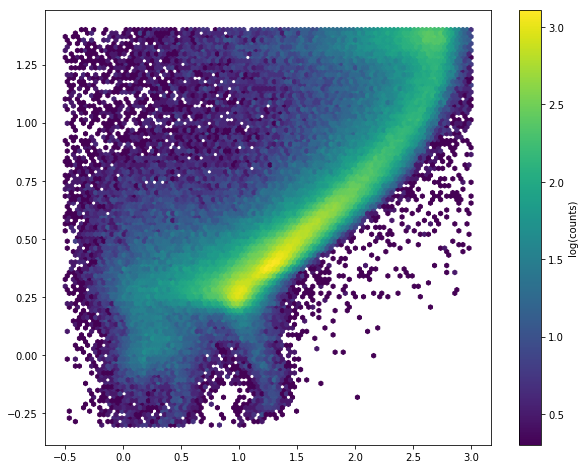

In [93]:
%matplotlib inline

# Select HLC-NSC data : 
# -->  point sources 
m_star = hlc_nsc['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = hlc_nsc['HLCgmag'] /hlc_nsc['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = hlc_nsc['HLCumag'][m]  - hlc_nsc['HLCrRED'][m]
g = hlc_nsc['HLCgmag'][m]  - hlc_nsc['HLCgRED'][m]
r  = hlc_nsc['HLCrmag'][m]  - hlc_nsc['HLCrRED'][m]

ug_hlc = u-g
gr_hlc = g-r

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
im1 = ax1.hexbin(ug_hlc,gr_hlc ,bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, oper)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


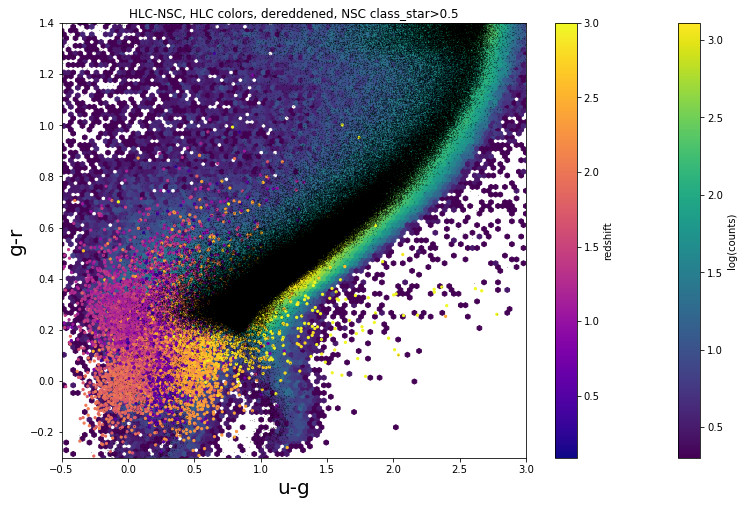

In [94]:
%matplotlib inline

# 2D-histogram of objects in the g-r vs r-i color diagram 
fig, ax1 = plt.subplots(1, 1, figsize=(13, 8))
im1 = ax1.hexbin(ug_hlc,gr_hlc, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5,3, -0.3,1.4))
plt.colorbar(im1, label='log(counts)')

# QSO
# -->  point sources 
m_star = qso['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = qso['HLCgmag'] / qso['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = qso['HLCumag'][m]  - qso['HLCuRED'][m]
g = qso['HLCgmag'][m]  - qso['HLCgRED'][m]
r  = qso['HLCrmag'][m]  - qso['HLCrRED'][m]
ug_qso = u-g
gr_qso = g-r
redshift_qso=qso['Z'].data[m]
cmap = plt.get_cmap('plasma', len(redshift_qso)) 


# STARS
# -->  point sources 
m_star = stars['NSCclass_star'] > 0.5
# --> signal / noise > 5 
m_sn = stars['HLCgmag'] / stars['HLCgerr'] > 5
m = m_sn * m_star

# deredden the HLC magnitudes ...
u = stars['HLCumag'][m]  - stars['HLCuRED'][m]
g = stars['HLCgmag'][m]  - stars['HLCgRED'][m]
r  = stars['HLCrmag'][m]  - stars['HLCrRED'][m]
ug_star = u-g
gr_star = g-r

# QUASARS
im = ax1.scatter(ug_qso, gr_qso, c=redshift_qso, cmap=cmap, s=5, vmax=3)
plt.colorbar(im, label='redshift')

# STARS 
ax1.scatter(ug_star, gr_star,c='k',s=0.01, label='stars')

ax1.set_xlim(-0.5,3)
ax1.set_ylim(-0.3,1.4)
ax1.set_xlabel('u-g',fontsize=20)
ax1.set_ylabel('g-r',fontsize=20)
ax1.set_title('HLC-NSC, HLC colors, dereddened, NSC class_star>0.5')
plt.savefig('hlc_nsc_qso_stars.png', bbox_inches='tight')

Above quasars are colored by their redshift. The black points are SDSS standard stars.  The background are all HLC-NSC sources. This tells us that indeed it should be possible to separate stars and QSO using u-g vs g-r color information. 